# Imports

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Read and Adjust data

In [83]:
# read data and describe it
data = pd.read_csv("data/magic04.data", header=None)
data.describe()

,0,1,2,3,4,5,6,7,8,9
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [84]:
x = data.drop(columns=10)
y = data[10]

In [85]:
# check the count of every class
y.value_counts()

10
g    12332
h     6688
Name: count, dtype: int64

In [86]:
resampler = RandomUnderSampler(random_state=42)
x, y = resampler.fit_resample(x, y)

In [87]:
y.value_counts()

10
g    6688
h    6688
Name: count, dtype: int64

In [67]:
# turn to np arrays and normalize y
x = np.array(x)
y = np.array([1 if c == "g" else 0 for c in balanced_data[10]])


In [68]:
# function to plot each feature with the target to visualize each feature range and effect
# y2 optional parameter to plot predections as well as target if desired
def plot_features(x, y, y2=None, n_features=2):
    fig, ax = plt.subplots(1, n_features, sharey=True)

    for i in range(len(ax)):
        ax[i].scatter(x[:, i], y)

    if y2 is not None:
        for i in range(len(ax)):
            ax[i].scatter(x[:, i], y2, color='red', facecolors="none")


    fig.set_figwidth(20)
    fig.set_figheight(7)

    ax[0].set_ylabel("price")

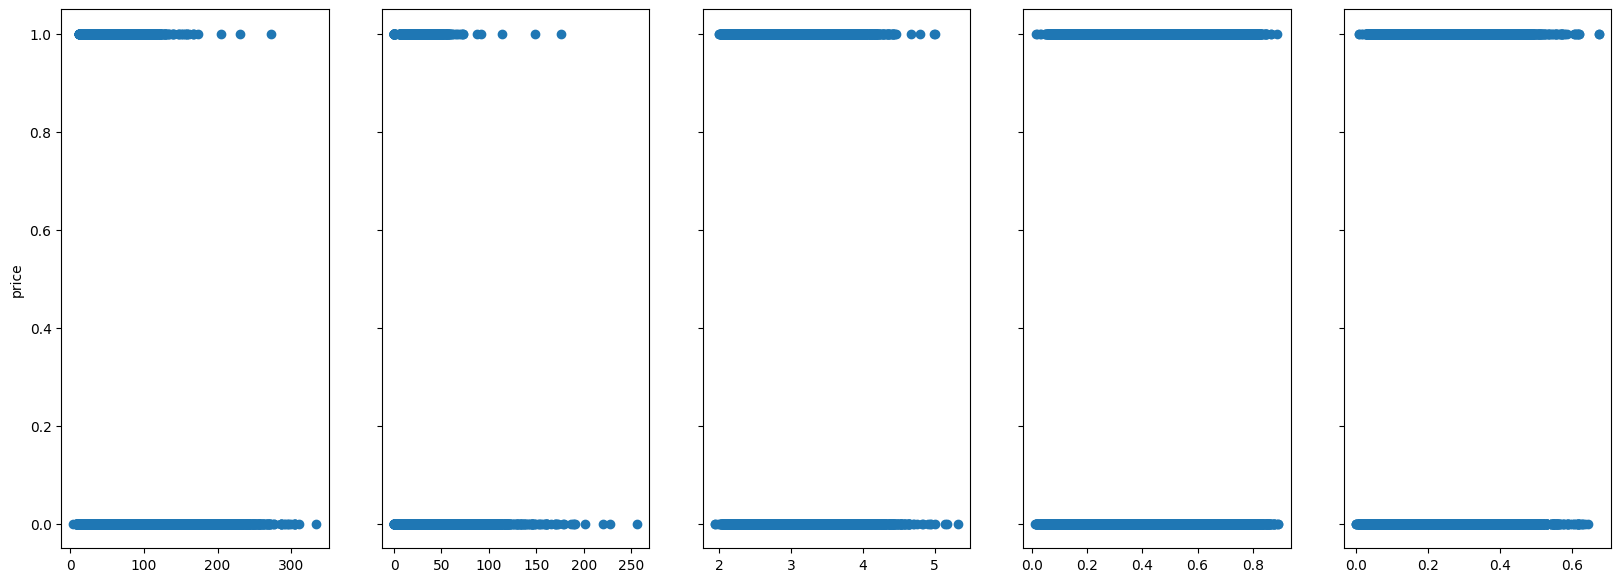

In [69]:
# ploting features before normalization
plot_features(x, y, n_features=5)

In [70]:
# normalize data
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [71]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9
count,13376.000000,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04,13376.000000,13376.000000,13376.000000,13376.000000,1.337600e+04
mean,0.000000,1.699863e-17,-1.138908e-15,2.974760e-17,1.338642e-16,0.000000,0.000000,0.000000,0.000000,4.249658e-18
std,1.000037,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037,1.000037,1.000037,1.000037,1.000037e+00
min,-1.127508,-1.133850e+00,-1.892575e+00,-1.985823e+00,-1.913371e+00,-6.881124,-6.013030,-8.884994,-1.165906,-2.540439e+00
25%,-0.695597,-5.725646e-01,-7.321727e-01,-7.894450e-01,-7.817974e-01,-0.257698,-0.397603,-0.484783,-0.895471,-6.885832e-01
50%,-0.396412,-3.134357e-01,-1.855942e-01,-1.267208e-01,-1.521529e-01,0.158529,0.126236,-0.010683,-0.295185,-2.493378e-02
75%,0.403141,1.177649e-01,5.797416e-01,6.862462e-01,6.507554e-01,0.478232,0.491079,0.465791,0.782802,6.290579e-01
max,5.887093,1.113860e+01,5.214415e+00,2.791003e+00,4.114246e+00,8.909961,4.091646,7.741114,2.170920,3.932278e+00


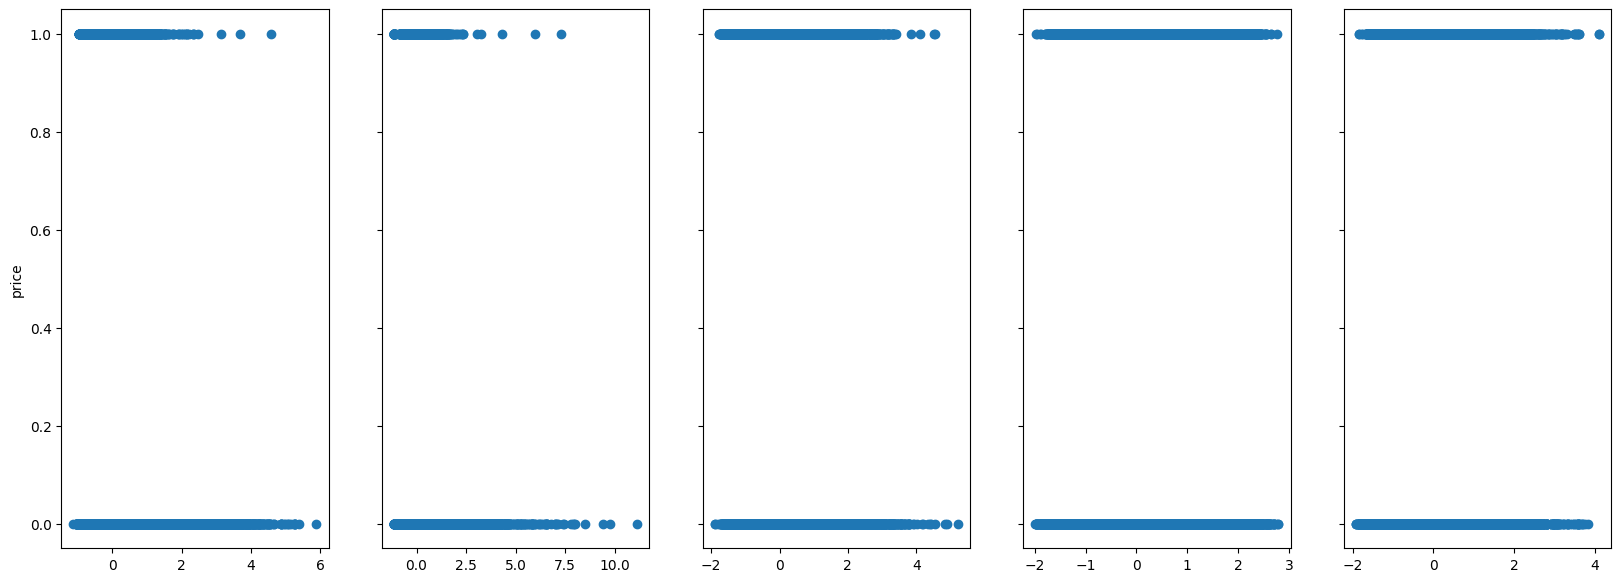

In [72]:
# ploting features after normalization
plot_features(x, y, n_features=5)

In [73]:
x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.7, random_state=0)

# Train and Assess Logestic Regression model

In [74]:
model = LogReg()
model.fit(x_train, y_train)

LogisticRegression()

In [75]:
prediction = model.predict(x_eval)
print(classification_report(y_eval, prediction))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      4724
           1       0.74      0.82      0.78      4640

    accuracy                           0.77      9364
   macro avg       0.77      0.77      0.77      9364
weighted avg       0.77      0.77      0.77      9364



# Train and Assess KNN model

In [76]:
knn = KNN(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [77]:
prediction = knn.predict(x_eval)
print(classification_report(y_eval, prediction))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      4724
           1       0.76      0.85      0.80      4640

    accuracy                           0.79      9364
   macro avg       0.79      0.79      0.79      9364
weighted avg       0.79      0.79      0.79      9364



In [78]:
knn = KNN(n_neighbors=5)
knn.fit(x_train, y_train)
prediction = knn.predict(x_eval)
print(classification_report(y_eval, prediction))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      4724
           1       0.76      0.87      0.81      4640

    accuracy                           0.80      9364
   macro avg       0.80      0.80      0.80      9364
weighted avg       0.80      0.80      0.80      9364



In [88]:
knn = KNN(n_neighbors=7)
knn.fit(x_train, y_train)
prediction = knn.predict(x_eval)
print(classification_report(y_eval, prediction))

              precision    recall  f1-score   support

           0       0.86      0.72      0.79      4724
           1       0.76      0.88      0.82      4640

    accuracy                           0.80      9364
   macro avg       0.81      0.80      0.80      9364
weighted avg       0.81      0.80      0.80      9364



In [91]:
knn = KNN(n_neighbors=9)
knn.fit(x_train, y_train)
prediction = knn.predict(x_eval)
print(classification_report(y_eval, prediction))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      4724
           1       0.76      0.89      0.82      4640

    accuracy                           0.80      9364
   macro avg       0.81      0.81      0.80      9364
weighted avg       0.81      0.80      0.80      9364



In [92]:
knn = KNN(n_neighbors=15)
knn.fit(x_train, y_train)
prediction = knn.predict(x_eval)
print(classification_report(y_eval, prediction))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      4724
           1       0.75      0.90      0.82      4640

    accuracy                           0.80      9364
   macro avg       0.81      0.80      0.80      9364
weighted avg       0.81      0.80      0.80      9364

